## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공

# 사이파이 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# Dataset 불러오기 및 data 정보 확인

## 데이터 불러오기

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df_iris = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\ADP_study\rawdata\iris.csv',
                      index_col = 'Unnamed: 0')
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


## 레이블 인코딩

In [3]:
# 문자로 된 범주형 데이터를 숫자로 변환한 컬럼 추가

encoder = LabelEncoder()
encoder.fit(df_iris['Species'])

df_iris['Species_No'] = encoder.transform(df_iris['Species'])
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species_No
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica,2
147,6.3,2.5,5.0,1.9,virginica,2
148,6.5,3.0,5.2,2.0,virginica,2
149,6.2,3.4,5.4,2.3,virginica,2


In [4]:
# 문자로 된 범주형 데이터를 숫자로 변환한 컬럼 추가
# df_iris['Species_No'] = df_iris['Species'].apply(lambda x: 0 if 'setosa' == x 
#                                                     else( 1 if 'versicolor' == x
#                                                     else 2 ))

# x값(예측변수), y값(목표변수) 설정
- SVM 에서는 NumPy array 형식의 데이터가 필요

In [5]:
# 목표변수와 나머지 변수들을 따로 저장

x = np.array( df_iris.iloc[: , [2,3]] )
y = np.array( df_iris.iloc[:, 5 ] )

# 학습/테스트용 데이터셋 분리
- `sklearn.model_selection.train_test_split()`
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
# 데이터셋 나누고 라벨 분포 확인
x_train, x_test, y_train, y_test  = train_test_split( x, y,
                                                      test_size = 0.30,
                                                      random_state = 153 )

# 라벨별 데이터 분포 확인
print( Counter(y_train) )
print()
print( Counter(y_test) )

Counter({1: 37, 0: 35, 2: 33})

Counter({2: 17, 0: 15, 1: 13})


In [7]:
y_test

array([0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0,
       0, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2, 2,
       2])

# 모델 생성 및 학습

## LinearSVC 모델 생성
- sklearn.svm: Support Vector Machines
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm
- 
- `sklearn.svm.SVC()`
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [9]:
model_svm = SVC( kernel = 'linear',
                     probability = True )  # ROC 계산을 위한 proba 산출을 위한 옵션

## train 데이터로 학습 수행
- `.fit()`
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit

In [10]:
model_svm.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [11]:
# 새로운 테스트 데이터로 예측하기
model_svm.predict( [ [5.1, 0.2] ] )

array([1])

# 시각화

- `mlxtend.plotting.plot_decision_regions()`
- http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

In [13]:
x_train

array([[4.1, 1.3],
       [5.4, 2.1],
       [5.1, 2.4],
       [4.6, 1.4],
       [6.7, 2.2],
       [4.7, 1.6],
       [5. , 1.7],
       [4.9, 1.5],
       [1.7, 0.2],
       [1.3, 0.3],
       [5. , 1.9],
       [4. , 1.2],
       [1.6, 0.2],
       [1.7, 0.4],
       [5.2, 2.3],
       [6.9, 2.3],
       [6.1, 2.5],
       [1.5, 0.1],
       [5.6, 2.1],
       [4.1, 1.3],
       [1.4, 0.1],
       [1.6, 0.2],
       [5.3, 2.3],
       [4.5, 1.7],
       [1.9, 0.2],
       [6. , 1.8],
       [1.7, 0.3],
       [4.7, 1.4],
       [5.1, 1.6],
       [4.4, 1.2],
       [3.3, 1. ],
       [5.4, 2.3],
       [1.6, 0.4],
       [1.5, 0.2],
       [6.3, 1.8],
       [4.9, 1.5],
       [5.8, 2.2],
       [4.1, 1. ],
       [4. , 1.3],
       [1.4, 0.2],
       [1.4, 0.3],
       [3.8, 1.1],
       [1.3, 0.4],
       [4.8, 1.8],
       [6.6, 2.1],
       [1.4, 0.2],
       [1.4, 0.2],
       [1.4, 0.3],
       [5.7, 2.1],
       [1.3, 0.2],
       [1.5, 0.3],
       [5.5, 1.8],
       [4.7,

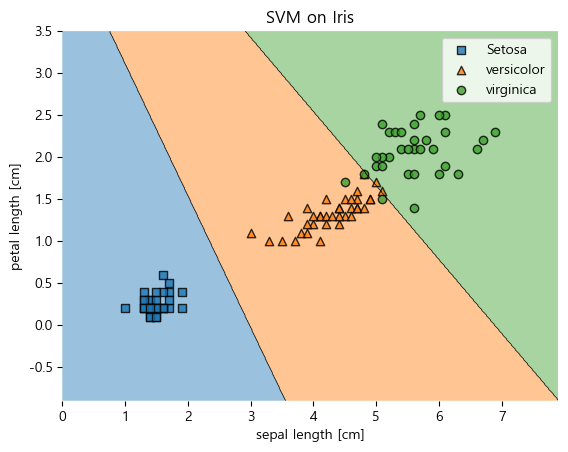

In [12]:
# Plotting decision regions
plot_decision_regions( x_train, y_train,
                       clf = model_svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')

L = plt.legend()
L.get_texts()[0].set_text('Setosa')
L.get_texts()[1].set_text('versicolor')
L.get_texts()[2].set_text('virginica')

plt.show()

In [ ]:
# 마진을 표현하는 선 추가 ( 종속변수가 3개 이상일때는 안먹힘)

# 결정 함수 플로팅
#ax = plt.gca()
#xlim = ax.get_xlim()
#ylim = ax.get_ylim()

# 모델 평가를위한 그리드 생성
#xx = np.linspace(xlim[0], xlim[1], 30)  # 0에서 1까지의 구간을 30개 간격으로 나눈 배열 생성 
#yy = np.linspace(ylim[0], ylim[1], 30)
#YY, XX = np.meshgrid(yy, xx)
#xy = np.vstack([XX.ravel(), YY.ravel()]).T

#Z = model_svm.decision_function(xy).reshape(XX.shape)

# 결정 경계와 마진
#ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#           linestyles=['--', '-', '--'])

#plt.show()

# 예측 및 평가

## 학습된 모델로 예측 수행
- `.predict()`
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.predict

In [ ]:
# test 데이터로 라벨 예측
y_pred = model_svm.predict( x_test )

df_pred_result = pd.DataFrame( {'True' : y_test,
                                'Predict' : y_pred,
                                'Pred_Result' : y_test == y_pred} )

In [ ]:
df_pred_result

## 평가

### Confusion Metrix

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )

### 분석 지표
- `sklearn.metrics.accuracy_score()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- `sklearn.metrics.classification_report()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [ ]:
# Accuracy
model_svm.score( x_test, y_test )

In [ ]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

### 데이터별 예측 확률
- `.predict_proba()`
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict_proba

In [ ]:
proba = model_svm.predict_proba(x_test)

df_proba = pd.DataFrame( proba, columns = model_svm.classes_ )
df_proba.head()

### ROC curve / AUC
- `sklearn.metrics.roc_curve()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
- `sklearn.metrics.RocCurveDisplay()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
- `sklearn.metrics.roc_auc_score()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
- 
- [참고] https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [ ]:
y_test

In [ ]:
result_0

In [ ]:
# 'virginica' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
result_0 = np.where( y_test == 0, 1, 0 )

# 'virginica' 에 대한 proba 추출'
proba_0 = df_proba[0]

# AUC 계산
print('AUC: ', roc_auc_score( result_0, proba_0 ) )

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, proba_0 , pos_label = 1 )

RocCurveDisplay( fpr, tpr).plot()

plt.plot( [0,1], [0,1],
          label = 'Random')
plt.show()

In [ ]:
# 'virginica' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
result_1 = np.where( y_test == 1, 1, 0 )

# 'virginica' 에 대한 proba 추출'
proba_1 = df_proba[1]

# AUC 계산
print('AUC: ', roc_auc_score( result_1, proba_1 ) )

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, proba_1 , pos_label = 1 )

RocCurveDisplay( fpr, tpr).plot()

plt.plot( [0,1], [0,1],
          label = 'Random')
plt.show()

In [ ]:
# 'virginica' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
result_2 = np.where( y_test == 2, 1, 0 )

# 'virginica' 에 대한 proba 추출'
proba_2 = df_proba[2]

# AUC 계산
print('AUC: ', roc_auc_score( result_2, proba_2 ) )

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( result_2, proba_2 )

RocCurveDisplay( fpr, tpr).plot()

plt.plot( [0,1], [0,1],
          label = 'Random')
plt.show()

In [ ]:
pd.DataFrame( {'y_test':y_test,
               'proba_0':df_proba[0],
               'proba_1':df_proba[1],
               'proba_2':df_proba[2]} ).

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle

In [ ]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = x.shape
X = np.c_[x, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=153)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
https://moons08.github.io/datascience/classification_score_roc_auc/

from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# make sample data
n_classes = 3
X, y = make_classification(n_samples=200, n_features=5,
                           n_informative=3, n_redundant=2
                           , n_clusters_per_class=2
                           , n_classes=n_classes
                           , weights=[0.3, 0.2, 0.5]
                           , random_state=99)

y = label_binarize(y, classes=[0,1,2])

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# classifier
clf = OneVsRestClassifier(GaussianNB())
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)
  # 나이브베이즈 모델은 predict_proba 메서드로 각 클래스별 probability를 구할 수 있습니다.

# ROC & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(131+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(y_test, y_score, multi_class='raise'))